In [1]:
import matplotlib.pyplot as plt
print(plt.style.available)
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid") 

In [3]:
plt.style.use('ggplot') 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Wczytanie danych z przygotowanego wcześniej pliku
df = pd.read_csv(r"C:\Users\arcis\OneDrive\Pulpit\4_korozja_ywbrany\dane_infrastruktury_wodorowej.csv")

# Ustawienie stylu seaborn bez używania plt.style
sns.set_theme()

# 1. Rozkład stopnia korozji histogram 10x6
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stopien_korozji', hue='kategoria_ryzyka', multiple='stack')
plt.title('Rozkład Stopnia Korozji z Podziałem na Kategorie Ryzyka')
plt.xlabel('Stopień Korozji')
plt.ylabel('Liczba Wystąpień')
plt.tight_layout()
plt.savefig('rozklad_korozji.png')
plt.close()

# 2. Wpływ temperatury na korozję
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperatura', y='stopien_korozji', hue='material')
plt.title('Wpływ Temperatury na Stopień Korozji')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Stopień Korozji')
plt.tight_layout()
plt.savefig('temperatura_korozja.png')
plt.close()

# 3. Lista kolumn numerycznych, które mają być analizowane pod kątem korelacji.
numeric_columns = ['temperatura', 'wilgotnosc', 'cisnienie', 'grubość_sciany', 
                  'poziom_wodoru', 'zasolenie', 'stopien_korozji']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz Korelacji Parametrów')
plt.tight_layout()
plt.savefig('macierz_korelacji.png')
plt.close()

# Podsumowanie statystyczne
print("\nPodsumowanie statystyczne według kategorii ryzyka:")
summary_stats = df.groupby('kategoria_ryzyka')['stopien_korozji'].describe()
print(summary_stats)

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu


Podsumowanie statystyczne według kategorii ryzyka:
                  count       mean       std        min        25%        50%  \
kategoria_ryzyka                                                                
niskie            298.0   6.027019  4.992059   0.002429   2.334423   4.955756   
wysokie           219.0  60.368555  9.510949  50.007895  53.039274  57.493154   
średnie           483.0  31.407313  7.393264  20.023475  25.447455  30.897290   

                        75%        max  
kategoria_ryzyka                        
niskie             7.846264  19.922162  
wysokie           64.375993  99.315350  
średnie           36.298944  49.996184  


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

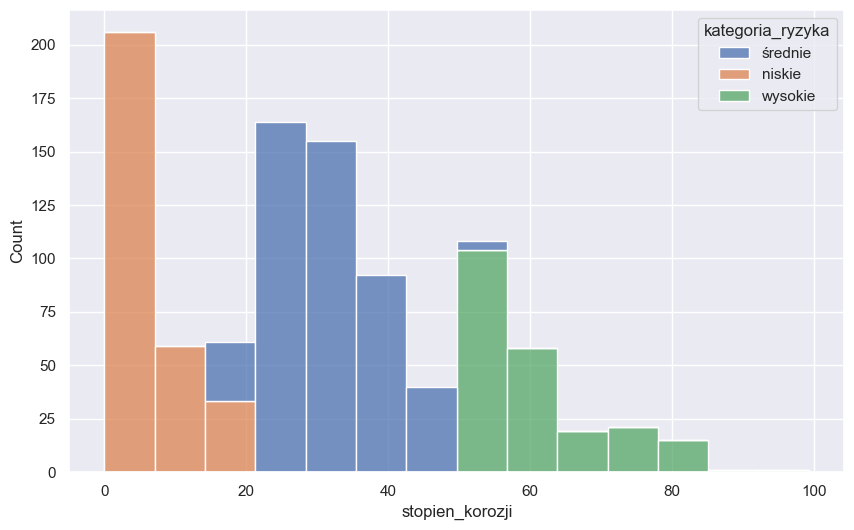

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stopien_korozji', hue='kategoria_ryzyka', multiple='stack')
plt.show()

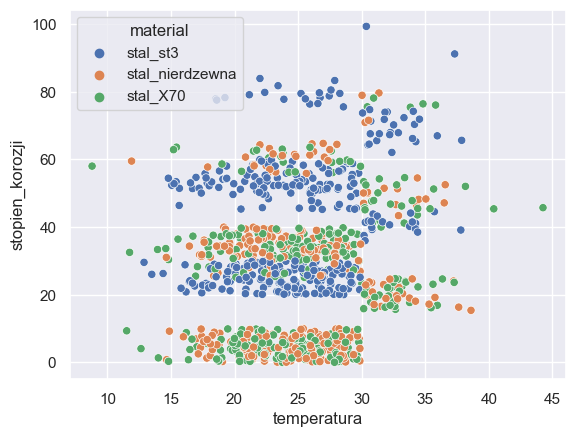

In [6]:
sns.scatterplot(data=df, x='temperatura', y='stopien_korozji', hue='material')
plt.show()

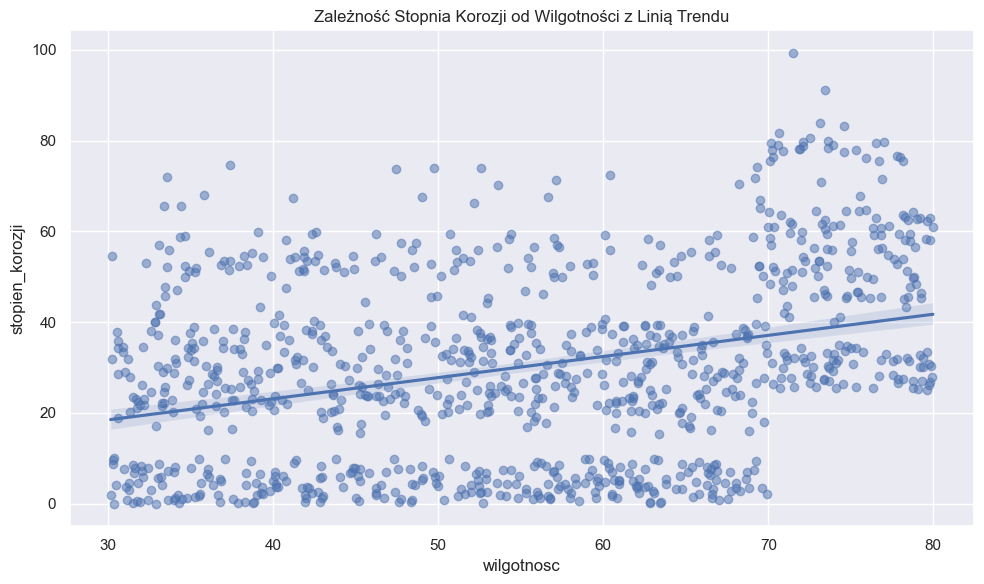

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='wilgotnosc', y='stopien_korozji', scatter_kws={'alpha':0.5})
plt.title('Zależność Stopnia Korozji od Wilgotności z Linią Trendu')
plt.tight_layout()
plt.savefig('regplot_wilgotnosc_korozja.png')
plt.show()
plt.close()

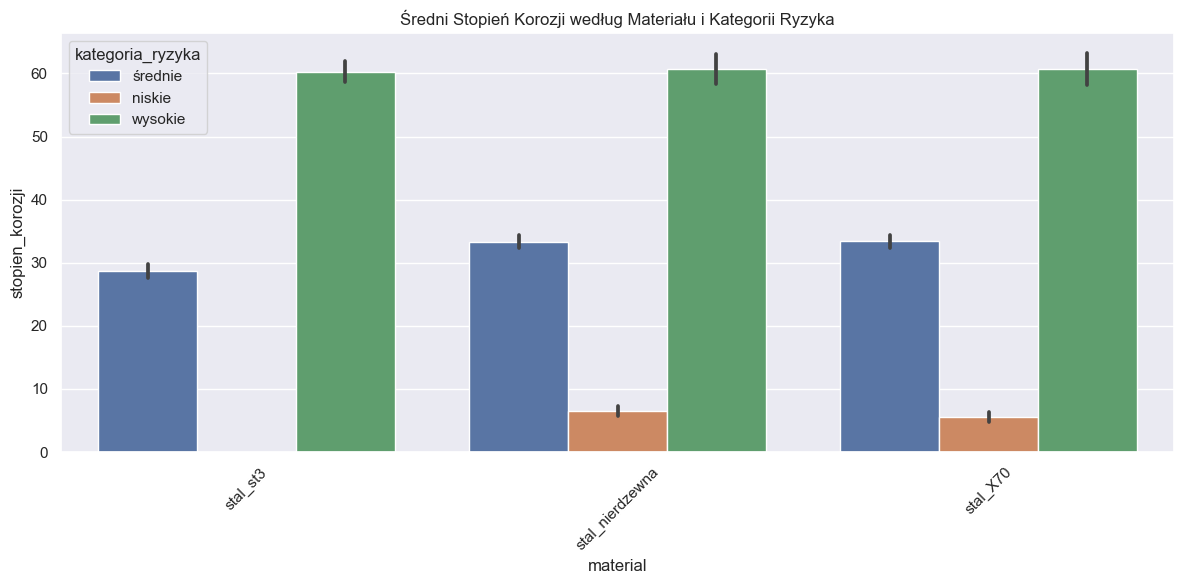

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='material', y='stopien_korozji', hue='kategoria_ryzyka')
plt.title('Średni Stopień Korozji według Materiału i Kategorii Ryzyka')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('barplot_material_ryzyko_korozja.png')
plt.show()
plt.close()